# Комп'ютерне моделювання задач прикладної математики

## Динамічні системи. 

###  Лабораторна робота 3

***Студентка Пороскун Олена. Група ПМ.м-21***

Варіант 8

*3. Карта показників Ляпунова*.

###### Теорія

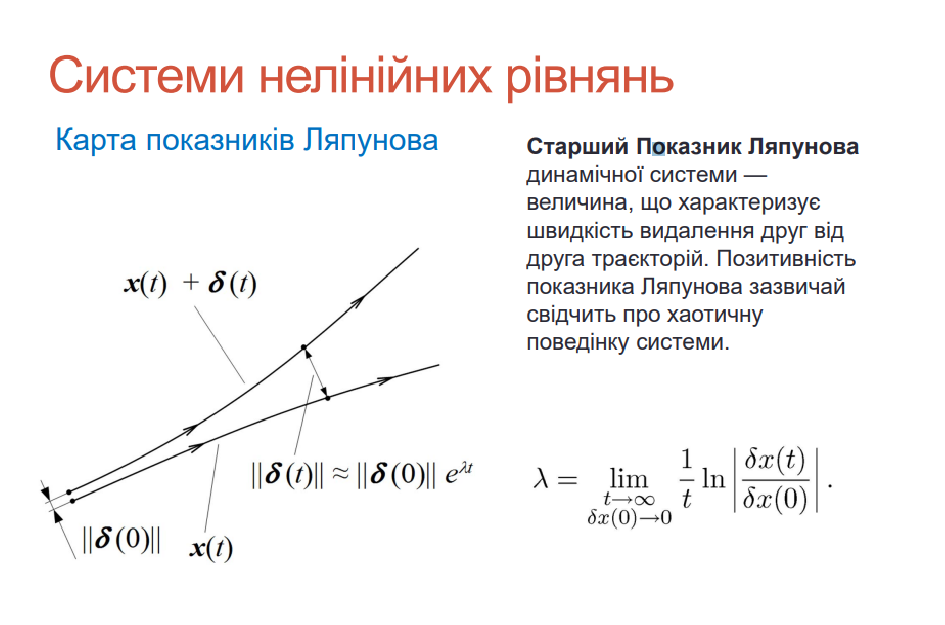

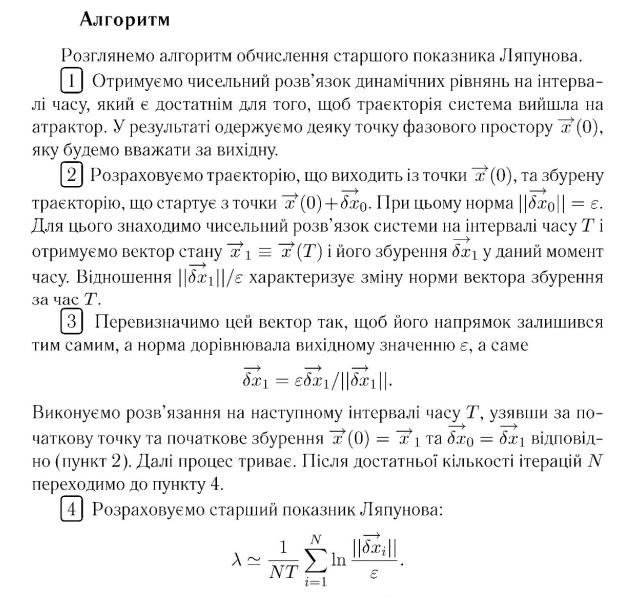

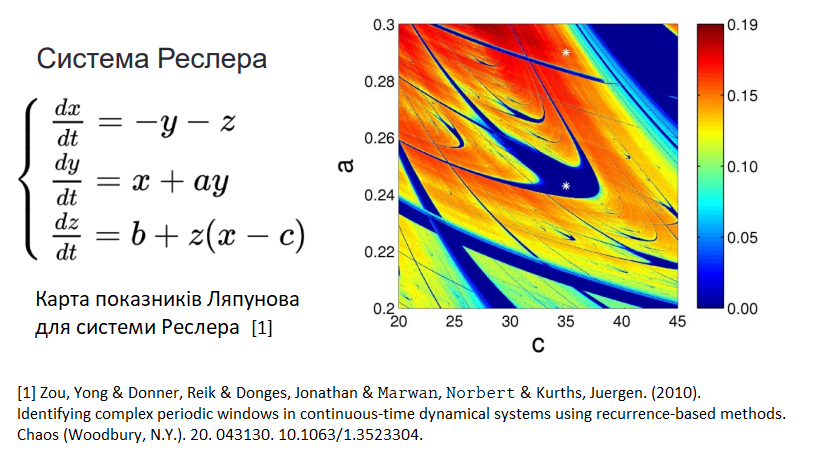

**Умова**

Система Реслера

**Р-ня**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm

###### 1 пункт
Потрібно отримати чисельний розв'зок динамічних рівнянь на деякому інтервалі часу(траєкторія має вийти на атрактор). Для цього створимо функцію $fun1(alpha, beta, str plot)$, де $alpha, beta$ - параметри системи, $str plot$ - змінна, що показує чи треба будувати графік атрактора чи ні.("plot" і для того щоб графік не будувався достатньо ввести будь-яку іншу змінну). Ця функція на виході дає $states$ - дані кривої атрактора. 

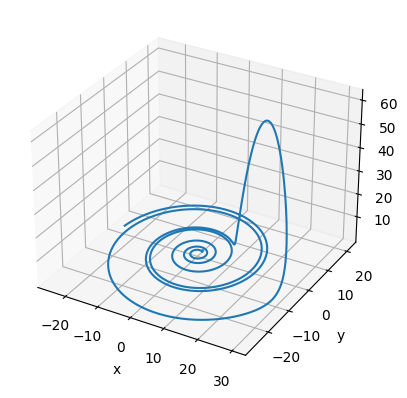

In [2]:
def fun1(a = 0.2, b = 0.2, c = 20, str_plot = "plot"):

    #print('fun1')
    
    def f(state, t):
        x, y, z = state                           # Unpack the state vector
        return -y-z, x + a*y, b + z*(x-c)   # Derivatives

    state0 = [1.0, 1.0, 1.0]
    t = np.arange(0.0, 40.0, 0.01)

    states = odeint(f, state0, t)
    
    if (str_plot == "plot"):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.plot(states[:, 0], states[:, 1], states[:, 2])
        plt.xlabel("x")
        plt.ylabel("y")
        plt.draw()
        plt.show()
        
    return states
    
vector_0 = fun1()  

Далі, щоб отримати деяку точку фазового простору $\vec{x}(0)$, скористаємося функцією $fun \ last \ el(array)$ - на виході дає останні значення стовпчиків масиву.

In [3]:
def fun_last_el(array):
    #print('fun_last_el')
    end = len(array)
    return [array[end-1, i] for i in range(3)]

###### 2 пункт
Тепер розраховуємо траєкторію з точки $\vec{x}(0)$ та збурену траєкторію з точки $\vec{x}(0)+\vec{\delta x_0}$. 
Знайдемо норму $\| \vec{\delta x_0} \| = \varepsilon$.
Далі беремо період часу T = 100 і отримуємо вектор $\vec{x}_1 \equiv \vec{x}(T)$ і його збурення $\vec{\delta x_1}$ у даний момент часу.

Функція $fun2(alpha, beta, state0, T)$ поверне одразу останню точку траєкторії. 

Її ж використовуємо і для функції $fun$_ $norm$_ $deltx1(vect0, vect$_ $deltx0, N, T, eps)$, що повертає масив норм $\vec{\delta x_1}$. Уже в цій функції ми переходимо до пункту 3.

###### 3 пункт
Перевизначеємо вектор $\vec{\delta x_1} = \varepsilon \ \vec{\delta x_1} / \| \vec{\delta x_1} \| $.

Далі ми знову інтегруємо на наступному інтервалі T, взявши 
$\vec{\delta x(0)}=\vec{\delta x_1}$ та $\vec{\delta x_0} = \vec{\delta x_1}$ (тобто знову переходимо до ***пункту 2***, але з новими вхідними даними). Це відбувається у циклі з N ітерацій. 

Тобто, на виході функції $fun$_ $norm$_ $deltx1$ ми маємо масив норм $\| \vec{\delta x_i} \|$, що необхідні для розрахунку **старшого показника Ляпунова**.

In [4]:
def fun2(a = 0.2, b = 0.2, c = 20, state0 = [1.0, 1.0, 1.0], T=100):
    #print('fun2')
    def f(state, t):
        x, y, z = state                           # Unpack the state vector
        return -y-z, x + a*y, b + z*(x-c)   # Derivatives
    t = np.arange(0.0, T, 0.01)
    states = odeint(f, state0, t)
    return fun_last_el(states)

In [5]:
def fun_norm_deltx1(vect0, vect_deltx0, N=50, T=100, eps=0.001):
    #print('fun_norm_deltx1')
    array_norm_deltx1 = []
    for n in range(1,N+1):
        # проінтегруємо з проміжком часу T=100
        vect1       = fun2(state0 = vect0,       T=T)
        vect_deltx1 = fun2(state0 = vect_deltx0, T=T) 
        # знайдемо збурення deltx1
        deltx1 = [vect_deltx1[i] - vect1[i] for i in range(3)]
        deltx1_no_ovveride = deltx1 
        
        # додамо до масиву норм дельт значення ще НЕ перевизначеного вектору
        array_norm_deltx1.append(norm(deltx1_no_ovveride))
        
        # друк проміжних результатів
        ''' 
        print('n', n)
        print('vect1 ', vect1)
        print('vect_deltx1 ', vect_deltx1)
        '''
        # Перевизначимо вектор  за формулою 
        # deltx1 = [eps*deltx1 / norm(deltx1)
        deltx1 = [eps*deltx1[i] / norm(deltx1) for i in range(3)] 
        '''
        print('deltx1(до перевизначення) ', deltx1_no_norm)
        print(' norm(deltx1) ', norm(deltx1))
        print('deltx1(після перевизначення) ', deltx1)
        '''
        
        vect_deltx11 = [vect1[i] + deltx1[i] for i in range(3)]
        
        #'''
        # знайдемо норму вектора deltx1 (перевизначеного)
        #norm_deltx1   = norm(deltx1)
        #array_norm_deltx1.append(norm_deltx1)
        
        # запишемо у початкові дані тепер знайдені величини (повернення до пункту 2)
        vect0       = vect1
        vect_deltx0 = vect_deltx11
        
    return array_norm_deltx1

In [6]:
def fun_norm_deltx1(vect0, vect_deltx0, N=50, T=100, eps=0.001):
    #print('fun_norm_deltx1')
    array_norm_deltx1 = []
    for n in range(1,N+1):
        # проінтегруємо з проміжком часу T=100
        vect1       = fun2(state0 = vect0,       T=T)
        vect_deltx1 = fun2(state0 = vect_deltx0, T=T) 
        # знайдемо збурення deltx1
        deltx1 = [vect_deltx1[i] - vect1[i] for i in range(3)]
        deltx1_no_ovveride = deltx1 
        
        # додамо до масиву норм дельт значення ще НЕ перевизначеного вектору
        array_norm_deltx1.append(norm(deltx1_no_ovveride))
        
        # друк проміжних результатів
        ''' 
        print('n', n)
        print('vect1 ', vect1)
        print('vect_deltx1 ', vect_deltx1)
        '''
        # Перевизначимо вектор  за формулою 
        # deltx1 = [eps*deltx1 / norm(deltx1)
        deltx1 = [eps*deltx1[i] / norm(deltx1) for i in range(3)] 
        '''
        print('deltx1(до перевизначення) ', deltx1_no_ovveride)
        print(' norm(deltx1) ', norm(deltx1))
        print('deltx1(після перевизначення) ', deltx1)
        '''
        # знайдемо норму вектора deltx1 (перевизначеного)
        #norm_deltx1   = norm(deltx1)
        #array_norm_deltx1.append(norm_deltx1)
        
        # запишемо у початкові дані тепер знайдені величини (повернення до пункту 2)
        vect0       = vect1
        vect_deltx0 = vect_deltx1
    return array_norm_deltx1

###### 4 пункт
Розраховуємо старший показник Ляпунова:
$$ \lambda \simeq \frac{1}{N T} \sum_{i=1}^N  \ln {\frac{\| \vec{\delta x_i} \|}{\varepsilon}} $$

In [7]:
def fun_lyapunov_exponent(norm_deltx1=[0], T=100, N=50, eps=0.001):
    #print('fun_lyapunov_exponent')
    #print('T =', T, ', N =', N)
    len_ = len(norm_deltx1)
    ln = [np.log(norm_deltx1[i]) / eps  for i in range(len_)]
    sum_ln = np.sum(ln)
    lyapunov = sum_ln / (N*T)
    #print('lyapunov =', lyapunov)
    return lyapunov

**Отже**, тепер використаємо функції описані вище і обчислимо значення старшого показника Ляпунова для кожного зі значень в масиві $ alpha, beta $ за допомогою функції $fun$_ $params$_ $and$_ $lyapunov(T, N, arr$_ $alpha, arr$_ $beta)$.

In [8]:
def fun_params_and_lyapunov(T=100, N=10, arr_a=[0.2], arr_b=[0.2], arr_c=[20]):
    #print('fun_ans_params_and_lyapunov')
    #array_ans = ['a', 'b', 'c', 'lyap']
    array_ans = [[], [], [], []]
    for a_ in arr_a:
        b_ = a_
        for c_ in arr_c:
            '''
            print('\n початок ')
            print('a_ ', a_)
            print('b_  ', b_)
            print('c_  ', c_)
            '''
            vector_0 = fun1(a = a_, b = b_, c = c_, str_plot = "no_plot") 
            vect0 = fun_last_el(vector_0)
            deltx0 = [0.001 for i in vect0]
            vect_deltx0 = [i + deltx0[0] for i in vect0]
            eps = norm(deltx0)
            '''
            print('vect0 ', vect0)
            print('deltx0 ', deltx0)
            print('vect_deltx0 ', vect_deltx0)
            print("eps = norm(delta) =", eps)
            print()
            '''
            array_norm_deltx1 = fun_norm_deltx1(vect0, vect_deltx0, N=N, T=T, eps=eps)
            lyapunov = fun_lyapunov_exponent(array_norm_deltx1, T=T, N=N, eps=eps)
            
            array_ans[0].append(a_)
            array_ans[1].append(b_)
            array_ans[2].append(c_)
            array_ans[3].append(lyapunov)
    return array_ans

In [9]:
array_lyapunov = fun_params_and_lyapunov(T=100, N=10)
array_lyapunov

[[0.2], [0.2], [20], [18.970073815178793]]

In [10]:
import time
start_time = time.time()

count_points = 25

a1 = np.linspace(0.2, 0.3, count_points)
b1 = a1
c1 = np.linspace(20, 45, count_points)

a1 = np.round(a1, 6)
b1 = a1
c1 = np.round(c1, 6)

array_lyapunov = fun_params_and_lyapunov(T=100, N=10, arr_a=a1, arr_b=b1, arr_c=c1)
print("--- %s seconds ---" % (time.time() - start_time))

--- 325.70369935035706 seconds ---


***Далі побудуємо теплову карту з показниками Ляпунова. Вісь $X$ - параметри $alpha$,  $Y$ - параметри $beta$***.

In [11]:
print('shape(array_lyapunov) = ', np.shape(array_lyapunov))

shape(array_lyapunov) =  (4, 625)


In [12]:
lyap = array_lyapunov[:][3]
np.shape(lyap)

(625,)

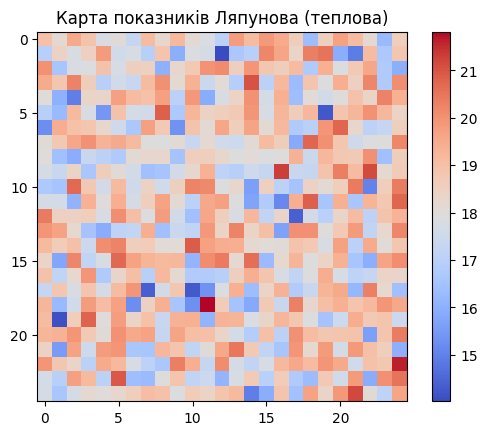

In [13]:
from matplotlib import cm

# Make plot with vertical (default) colorbar
fig, ax = plt.subplots()

lyap = array_lyapunov[3][:]
data = np.resize(lyap, (count_points,count_points))

cax = ax.imshow(data, interpolation='nearest', cmap=cm.coolwarm)
ax.set_title('Карта показників Ляпунова (теплова)') # with vertical colorbar

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax)
#cbar = fig.colorbar(cax, ticks=[-1, 0, 1])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

plt.show()

In [14]:
np.shape(array_lyapunov)

(4, 625)

In [15]:
lyap[:30]

[18.970073815178793,
 18.155977597471978,
 19.518153949529545,
 18.913657217311407,
 17.777814619155755,
 18.02135392563667,
 17.297014166173938,
 19.10093426761861,
 18.25541497591669,
 19.17050444220125,
 18.102733677623547,
 17.80471231166522,
 17.007427597095752,
 19.794484717345856,
 19.090301333222932,
 19.839132413576227,
 19.49626667389011,
 18.606869043855212,
 16.36027752383907,
 18.542461351220048,
 19.694137211098074,
 19.100589562536555,
 18.190463570720254,
 16.26138636728454,
 18.567054283938493,
 16.943788276059873,
 18.42631025306675,
 17.765772914465135,
 18.490081517314323,
 19.829757450239093]

In [16]:
import seaborn as sns
import pandas as pd

Створимо датафрейм для виводу через бібліотеку **seaborn**.

In [17]:
print('a ', 'b  ', 'c  ', 'lyapunov exponent')
list(zip(array_lyapunov[0][:11], array_lyapunov[1][:11], array_lyapunov[2][:11],array_lyapunov[3][:11]))

a  b   c   lyapunov exponent


[(0.2, 0.2, 20.0, 18.970073815178793),
 (0.2, 0.2, 21.041667, 18.155977597471978),
 (0.2, 0.2, 22.083333, 19.518153949529545),
 (0.2, 0.2, 23.125, 18.913657217311407),
 (0.2, 0.2, 24.166667, 17.777814619155755),
 (0.2, 0.2, 25.208333, 18.02135392563667),
 (0.2, 0.2, 26.25, 17.297014166173938),
 (0.2, 0.2, 27.291667, 19.10093426761861),
 (0.2, 0.2, 28.333333, 18.25541497591669),
 (0.2, 0.2, 29.375, 19.17050444220125),
 (0.2, 0.2, 30.416667, 18.102733677623547)]

In [18]:
lyap     = array_lyapunov[3][:]
lyap_arr = np.array(lyap)
lyap_arr = np.reshape(lyap_arr, (count_points,count_points))

data_frame = pd.DataFrame(lyap_arr,  
                  columns = c1,
                  index = a1)
print('a=b ⇊,  c ⇉')
data_frame

a=b ⇊,  c ⇉


,20.000000,21.041667,22.083333,23.125000,24.166667,25.208333,26.250000,27.291667,28.333333,29.375000,...,35.625000,36.666667,37.708333,38.750000,39.791667,40.833333,41.875000,42.916667,43.958333,45.000000
0.200000,18.970074,18.155978,19.518154,18.913657,17.777815,18.021354,17.297014,19.100934,18.255415,19.170504,...,19.839132,19.496267,18.606869,16.360278,18.542461,19.694137,19.100590,18.190464,16.261386,18.567054
0.204167,16.943788,18.426310,17.765773,18.490082,19.829757,17.579692,17.735612,16.961892,18.874328,15.950890,...,20.173284,19.612277,18.370864,20.351068,20.518608,15.913865,14.921439,19.080467,16.687292,18.803081
0.208333,20.005281,16.601131,17.794744,17.799099,18.949215,17.717304,18.502894,18.452940,16.018081,18.235935,...,18.789290,18.613913,19.121172,16.758365,19.387847,17.875866,18.730072,19.588669,16.790538,15.959536
0.212500,19.500966,18.808747,20.273175,18.589449,16.948779,17.589050,17.361858,19.090482,20.043693,18.117548,...,17.031601,19.177447,16.308261,18.861875,17.866680,19.431274,18.477391,20.177334,16.781644,20.070332
0.216667,17.983745,16.017870,14.964183,18.372211,18.319463,19.738435,19.118348,18.976266,19.730403,17.012725,...,17.668209,19.410247,16.367875,18.067150,17.627938,17.996874,18.944676,18.367043,20.280387,19.386664
0.220833,16.951162,16.249143,19.148118,17.796892,15.452484,18.952273,17.667012,17.639834,20.817312,16.702704,...,17.728893,19.240082,18.593639,19.199478,14.262277,18.852452,19.244213,20.006604,19.222216,18.376712
0.225000,15.256758,19.446012,18.980939,18.803034,18.282877,17.515263,16.659838,19.719982,18.730770,15.357176,...,18.113373,19.188987,16.778794,16.999067,19.928939,20.720387,18.280249,17.081015,17.249940,18.540789
0.229167,18.033256,18.741214,19.579905,19.997270,19.302166,19.524860,19.137568,17.930783,17.873954,18.118284,...,19.077414,18.600879,15.867985,20.748274,20.042118,18.818010,17.527875,17.841496,17.932786,20.210197
0.233333,17.964205,16.429709,15.911555,17.390260,17.064782,16.734370,18.086479,18.244721,18.267878,16.540505,...,17.880412,17.928777,19.324187,17.422862,19.205525,18.768010,18.702919,20.026130,16.451375,18.591288
0.237500,17.698246,17.389222,18.386244,16.626101,18.596148,18.039191,17.627538,16.432025,16.577364,17.629987,...,17.331921,21.274226,17.388245,17.325461,18.897876,20.341224,19.131970,21.145228,18.161059,18.676964


<AxesSubplot: >

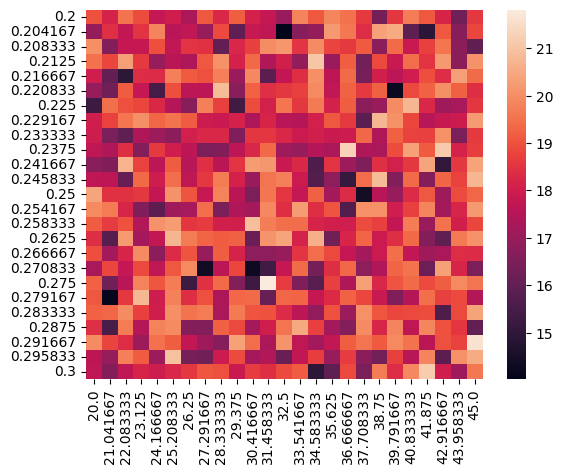

In [19]:
sns.heatmap(data_frame, annot = False, xticklabels='auto', yticklabels='auto', fmt=".1f")
# значеняня 'nan' виводиться як біле без числа

Ще один спосіб вивести

In [20]:
'''
start_time = time.time()

alphas = np.linspace(5, 10, 10)
betas  = np.linspace(0.1, 0.6, 10)

Alphas, Betas = np.meshgrid(alphas, betas)

array_lyapunov2 = fun_array_lyapunov(T=100, N=10, arr_alpha=alphas, arr_beta=betas)

x = array_lyapunov2[:][0]
y = array_lyapunov2[:][1]
z = array_lyapunov2[:][2]

#X, Y = np.meshgrid(x, y)

cs = plt.contourf(x, y, z)
plt.xlabel("x")
plt.ylabel("y")
cbar = plt.colorbar(cs)

print("--- %s seconds ---" % (time.time() - start_time))
'''

'\nstart_time = time.time()\n\nalphas = np.linspace(5, 10, 10)\nbetas  = np.linspace(0.1, 0.6, 10)\n\nAlphas, Betas = np.meshgrid(alphas, betas)\n\narray_lyapunov2 = fun_array_lyapunov(T=100, N=10, arr_alpha=alphas, arr_beta=betas)\n\nx = array_lyapunov2[:][0]\ny = array_lyapunov2[:][1]\nz = array_lyapunov2[:][2]\n\n#X, Y = np.meshgrid(x, y)\n\ncs = plt.contourf(x, y, z)\nplt.xlabel("x")\nplt.ylabel("y")\ncbar = plt.colorbar(cs)\n\nprint("--- %s seconds ---" % (time.time() - start_time))\n'